# CREDIT CARD FRAUD DETECTION

### GOAL
<ul><li><b>Implement machine learning based Credit Card Fraud Detection Model to recognize fraudulent credit card transactions.</b></li>
    <b>(Here, we will create a Logistic Regression Model)</b>

In [1]:
# import the external libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset from the csv file using pandas
card_df = pd.read_csv('creditcard.csv')

card_df.head()
#All the variable are not at the same scale and distribution. Example : Amount column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Code for checking if any feature has null values
card_df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
card_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### Amount column is not in same scale as other feature variables. (i.e. Given Data is not standardized)
### Scaling Amount Column using Standard Scaler function of scikit learn package  

In [6]:
#Scaling Amount Column
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
card_df['scaled_Amt']=scaler.fit_transform(card_df['Amount'].values.reshape(-1, 1))

In [7]:
#Dropping Time and orignal Amount column as they are not required
final_df = card_df.drop(['Time','Amount'],axis=1)
final_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
#Checking the balance between the 2 different Class [Fraud and Non Fraud] in the available data 
print('No Frauds', round(final_df['Class'].value_counts()[0]/len(final_df) * 100,2), '% of the dataset')
print('Frauds', round(final_df['Class'].value_counts()[1]/len(final_df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [9]:
final_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

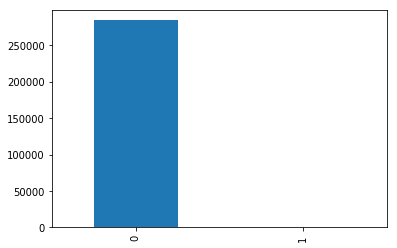

In [10]:
final_df['Class'].value_counts().plot(kind='bar')

### Clearly, the data is quite imbalanced. We need to resample it inorder to make it balanced.

In [11]:
#Module for resampling
from sklearn.utils import resample

In [12]:
# Separate majority and minority classes
#Non Fraud Class
df_majority = final_df[final_df.Class==0]
#Fraud Class
df_minority = final_df[final_df.Class==1]

In [13]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=492,     # to match minority class
                                 random_state=123) # reproducible results

In [15]:
#Check the number of records
df_majority.shape 

(284315, 30)

In [16]:
#Check the number of records
df_minority.shape

(492, 30)

In [17]:
#Check the number of records
df_majority_downsampled.shape

(492, 30)

In [18]:
#Merging the sampled data to create our sampled dataset
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [19]:
#Check the number of records
df_downsampled.shape

(984, 30)

In [22]:
#Verifying the sampled data
df_downsampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amt
143480,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,-1.609648,...,0.332076,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,0,-0.062808
163666,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,0.799470,...,-0.329597,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,0,-0.212137
137005,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,-0.528325,...,-0.258700,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0,-0.349271
155649,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,-1.045793,...,-0.242243,-0.528849,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,0,-0.344753
219246,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,0.253584,...,0.392735,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,0,-0.349231


In [23]:
#Counting the records of Class column from the sampled data
df_downsampled['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

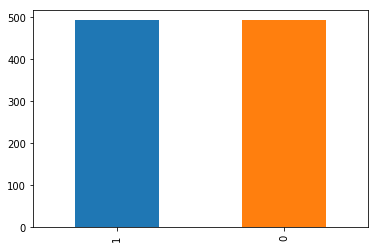

In [24]:
#Checking the balance between different Class by plotting a graph
df_downsampled['Class'].value_counts().plot(kind='bar')

### Splitting the data into Train and Test

In [25]:
#Assgining values to X and y variable for splitting the data into Train and Test
X = df_downsampled.drop('Class', axis=1)
y = df_downsampled['Class']

In [28]:
#Verifying the data
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_Amt
143480,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,-1.609648,...,0.099647,0.332076,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,-0.062808
163666,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,0.799470,...,-0.481298,-0.329597,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,-0.212137
137005,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,-0.528325,...,0.147480,-0.258700,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,-0.349271
155649,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,-1.045793,...,0.007715,-0.242243,-0.528849,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,-0.344753
219246,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,0.253584,...,-0.410936,0.392735,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,-0.349231


In [29]:
#Verifying the data
y.head()

143480    0
163666    0
137005    0
155649    0
219246    0
Name: Class, dtype: int64

In [30]:
#Splitting the data set using 'train_test_split' function of scikit learn package
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
#Checking the dimension of data
X_train.shape

(688, 29)

In [32]:
#Checking the dimension of data
y_train.shape

(688,)

In [33]:
#Checking the dimension of data
X_test.shape

(296, 29)

In [34]:
#Checking the dimension of data
y_test.shape

(296,)

### Supervised Machine Learning Model (Logistic Regression)

In [35]:
# Instantiate the model to an empty object
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [36]:
# Train the model using 'fit' method
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction

In [37]:
# Test the model using 'predict' method
y_pred = model.predict(X_test)

In [41]:
#Converting the y_test into list object from pandas dataframe. 
#The reason is as we randomly split the train and test dataset the indexes of the test_y won’t be in order. 
#If we convert the dataframe in to list object the indexes will be in order.
for i in range(0, 5):
        print("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], y_pred[i]))

Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 1
Actual outcome :: 1 and Predicted outcome :: 1
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0


### Validation

In [42]:
# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.93      0.92       150
          1       0.93      0.90      0.91       146

avg / total       0.92      0.92      0.92       296



In [43]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:",accuracy_score(y_test, y_pred))

Test Accuracy: 0.9155405405405406


In [44]:
print("Train Accuracy:",accuracy_score(y_train, model.predict(X_train)))

Train Accuracy: 0.9563953488372093


In [45]:
from sklearn.metrics import confusion_matrix
print(" Conusion matrix ", confusion_matrix(y_test, y_pred))

 Conusion matrix  [[140  10]
 [ 15 131]]


In [46]:

y_test[df_downsampled['Class']==0].shape[0]

150

In [47]:

y_test[df_downsampled['Class']==1].shape[0]

146

### Conclusion

Based on the <b>Classificaiton Report</b>, we were able to achieve the following:
<ul><li>Overall the precision to predict fraud transaction is 92% times correct</li>
    <li>Overall, the recall that the model correctl predicts fraud transaction is 92%</li>
</ul>
    
The Test accuracy of the model is <b>91.55%</b>.

Also ,based on the <b>Confusion Matrix</b>, we were able to achieve the following:
<ul>
<li>Out of 150 records of non fraud transactions, the model is able to predict 140 records</li>
<li>Out of 146 records of fraud transactions, the model is able to predict 131 records</li></ul>

We can achieve a better result if we get more training data.